# INDIAN DOMESTIC TOURIST PREDICTION

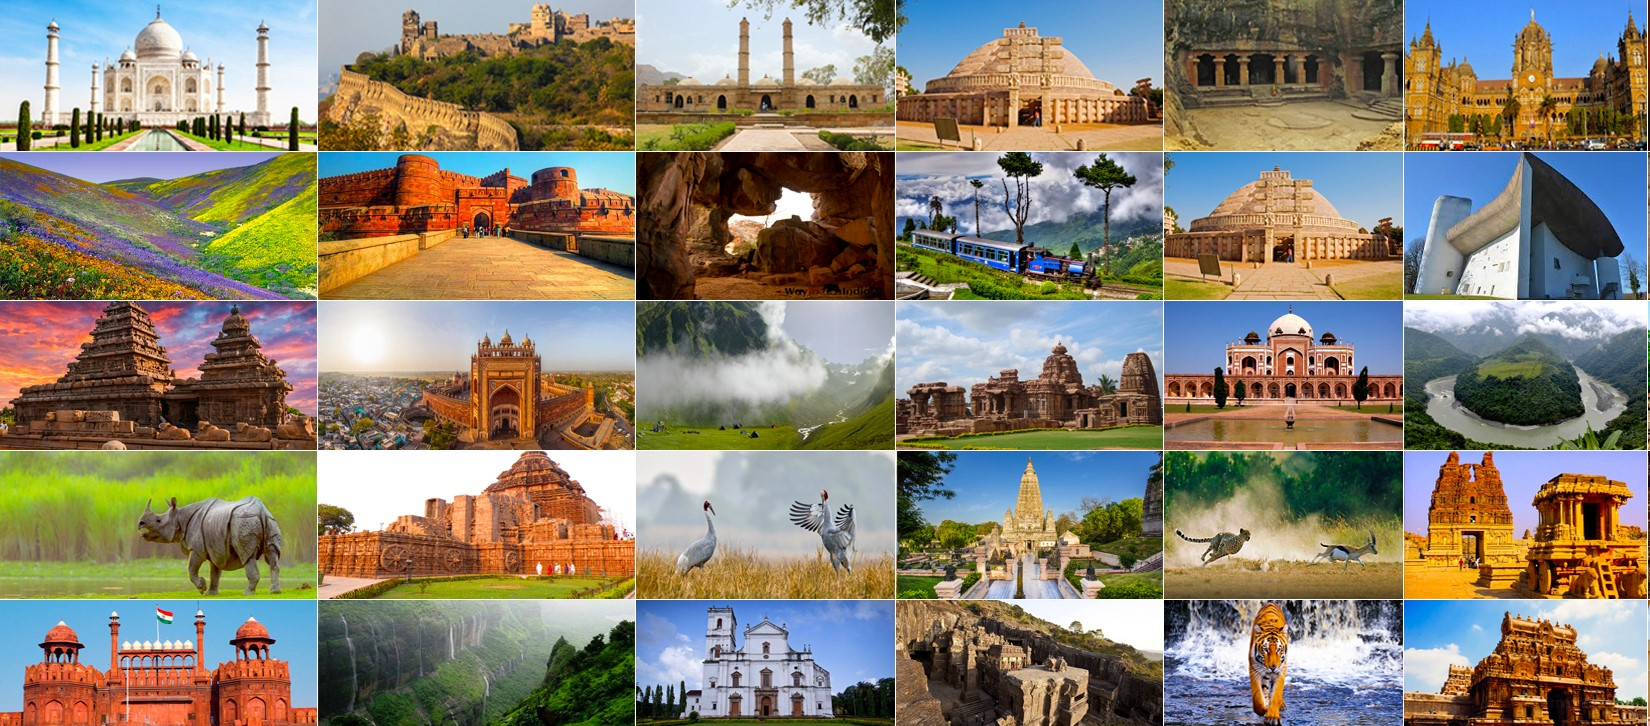

<p><b> In this project we processing and exploring data on Indian tourism statistics. Each row in the dataset represents a tourist spots, whereas, each column contains different attributes.It contains   information regarding the indian tourist spots and places from various parts of India. It also providing information regarding the travel population and growth of domestic tourism in India.</b></p>

## Importing  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

### Loading the dataset

In [2]:
df=pd.read_csv("./India-Tourism-Statistics-2021-Table-5.2.3.csv")
df.head(20)

,Circle,Name of the Monument,Domestic-2019-20,Foreign-2019-20,Domestic-2020-21,Foreign-2020-21,% Growth 2021-21/2019-20-Domestic,% Growth 2021-21/2019-20-Foreign
0,Agra,Taj Mahal,4429710,645415,1259892,9034,-71.56,-98.60
1,Agra,Agra Fort,1627154,386522,371242,2810,-77.18,-99.27
2,Agra,Fatehpur Sikri,454376,184751,107835,574,-76.27,-99.69
3,Agra,Akbar Tomb Sikandra,229270,19625,99509,321,-56.60,-98.36
4,Agra,Mariam tomb Sikandra,22517,414,9765,31,-56.63,-92.51
5,Agra,Itimad-ud-Daulah-Tomb,132800,82692,41016,410,-69.11,-99.50
6,Agra,Ram Bagh,84051,355,18599,54,-77.87,-84.79
7,Agra,Mehtab Bagh,178574,62325,62652,544,-64.92,-99.13
8,Agra,Mausoleum,474462,12536,91185,321,-80.78,-97.44
9,Total,Total,7632914,1394635,2061695,14099,-72.99,-98.99


### Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Circle                             178 non-null    object 
 1   Name of the Monument               178 non-null    object 
 2   Domestic-2019-20                   178 non-null    int64  
 3   Foreign-2019-20                    178 non-null    int64  
 4   Domestic-2020-21                   178 non-null    int64  
 5   Foreign-2020-21                    178 non-null    int64  
 6   % Growth 2021-21/2019-20-Domestic  177 non-null    float64
 7   % Growth 2021-21/2019-20-Foreign   176 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 11.2+ KB


In [4]:
df.describe()

,Domestic-2019-20,Foreign-2019-20,Domestic-2020-21,Foreign-2020-21,% Growth 2021-21/2019-20-Domestic,% Growth 2021-21/2019-20-Foreign
count,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,177.000000,176.000000
mean,7.349507e+05,4.645889e+04,2.216811e+05,7008.859551,-28.225367,937.419148
std,3.375224e+06,2.412842e+05,1.009087e+06,40252.182392,336.849629,6859.564220
min,5.300000e+02,0.000000e+00,0.000000e+00,0.000000,-99.990000,-100.000000
25%,4.586950e+04,1.697500e+02,1.427275e+04,14.500000,-76.760000,-99.010000
50%,1.765070e+05,1.747000e+03,5.747650e+04,101.500000,-64.010000,-97.000000
75%,4.641905e+05,1.242850e+04,1.524880e+05,340.000000,-50.860000,-81.625000
max,4.360708e+07,2.756561e+06,1.315308e+07,415859.000000,4233.770000,62078.430000


In [5]:
df.isnull().mean()*100

Circle                               0.000000
Name of the Monument                 0.000000
Domestic-2019-20                     0.000000
Foreign-2019-20                      0.000000
Domestic-2020-21                     0.000000
Foreign-2020-21                      0.000000
% Growth 2021-21/2019-20-Domestic    0.561798
% Growth 2021-21/2019-20-Foreign     1.123596
dtype: float64

In [6]:
df.shape

(178, 8)

In [7]:
df.rename(columns = {'% Growth 2021-21/2019-20-Domestic':'Domestic growth 2019-2021'}, inplace = True)
df.rename(columns = {'% Growth 2021-21/2019-20-Foreign':'Foreign Growth 2019-2021'},inplace = True)

In [8]:
df['Foreign Growth 2019-2021'].fillna(df['Foreign Growth 2019-2021'].mean(),inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().mean()*100

Circle                       0.0
Name of the Monument         0.0
Domestic-2019-20             0.0
Foreign-2019-20              0.0
Domestic-2020-21             0.0
Foreign-2020-21              0.0
Domestic growth 2019-2021    0.0
Foreign Growth 2019-2021     0.0
dtype: float64

### Univariate Analysis

### Hist plot

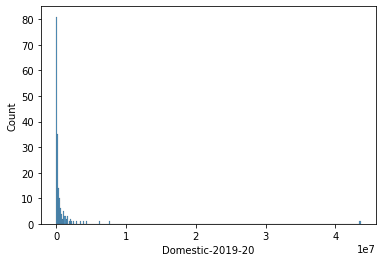

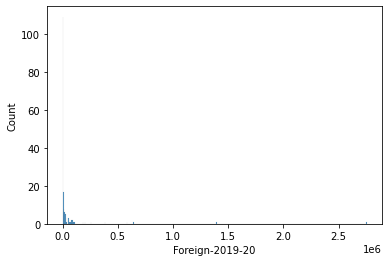

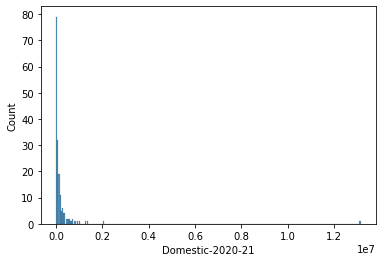

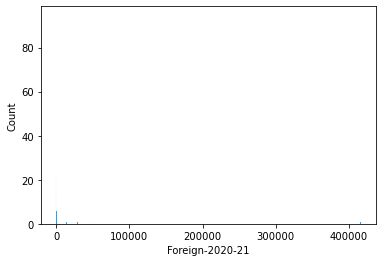

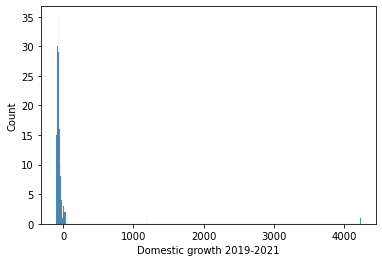

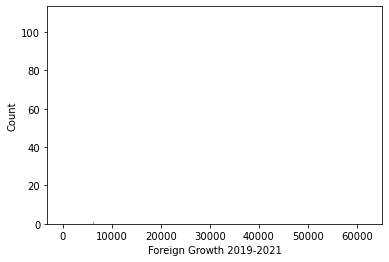

In [12]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.histplot(x =df[i] )
        plt.show()

### kde plot

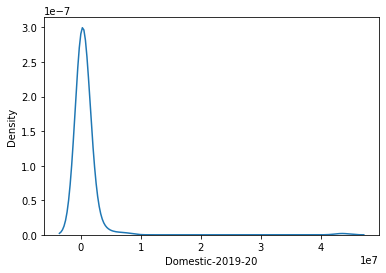

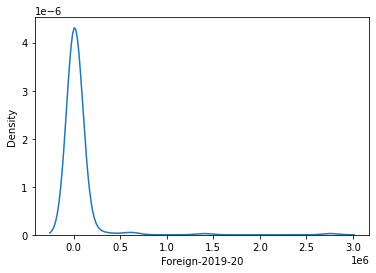

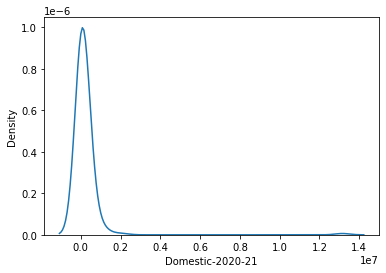

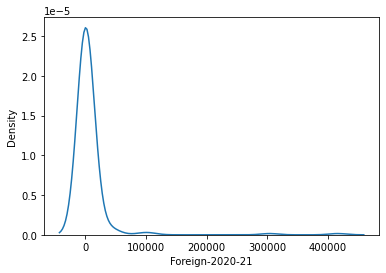

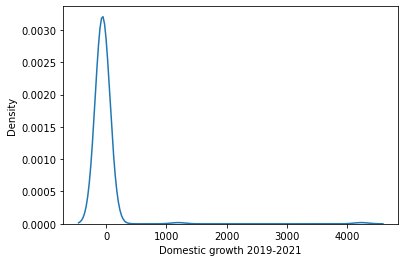

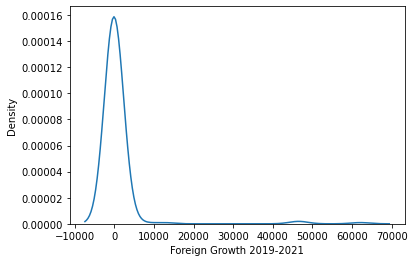

In [13]:
for i in df.columns:
    if df[i].dtypes != "object":
        plt.figure(figsize=(6,4))
        sns.kdeplot(x =df[i] )
        plt.show()

### box plot

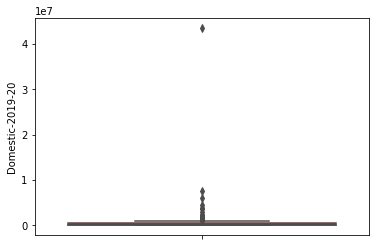

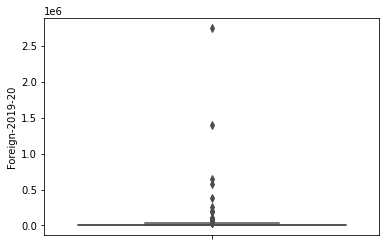

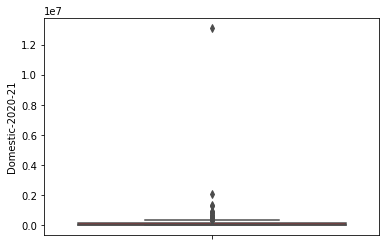

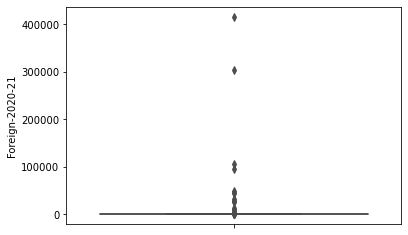

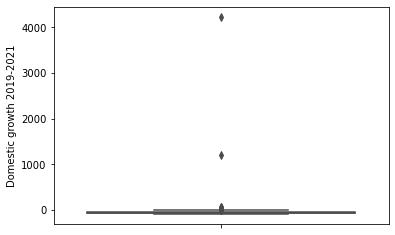

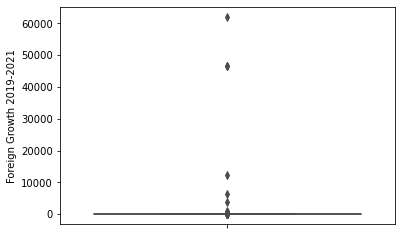

In [14]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i],color='red')
        plt.show()

### Outlier Removal

In [15]:
def outlier_treatment(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [16]:
for column in df.columns:
    if df[column].dtype !='object':
        UL,LL= outlier_treatment (df[column])
        df[column]=np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

### Droping null values

In [17]:
df.dropna(inplace=True)

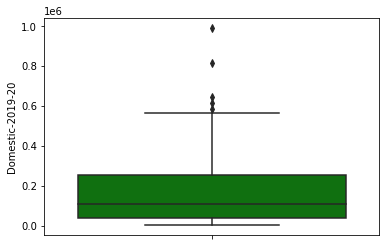

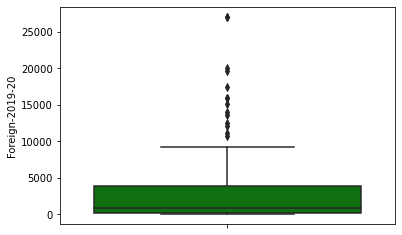

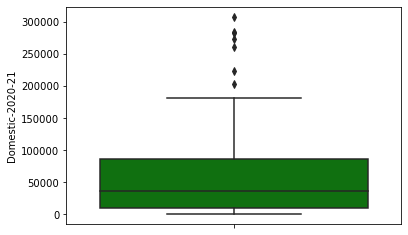

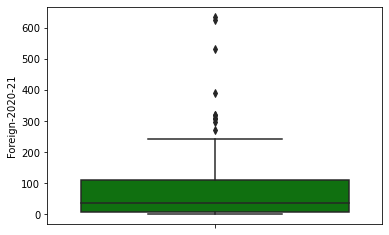

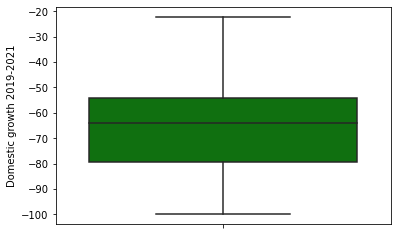

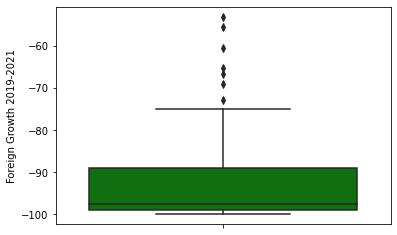

In [18]:
for i in df.columns:
    if df[i].dtype !='object':
        sns.boxplot(y=df[i],color='green')
        plt.show();

## Multivariate Analysis

### count plot

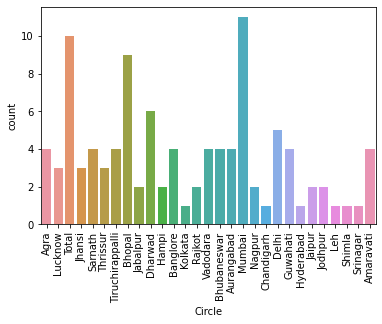

In [19]:
sns.countplot('Circle',data=df)
plt.xticks(rotation = 90)
plt.show()

## Inferences:
We can see the top tourist visited cities are Mumbai,Bhopal etc and shortly visited cities are Kolkata ,Chandigarh etc

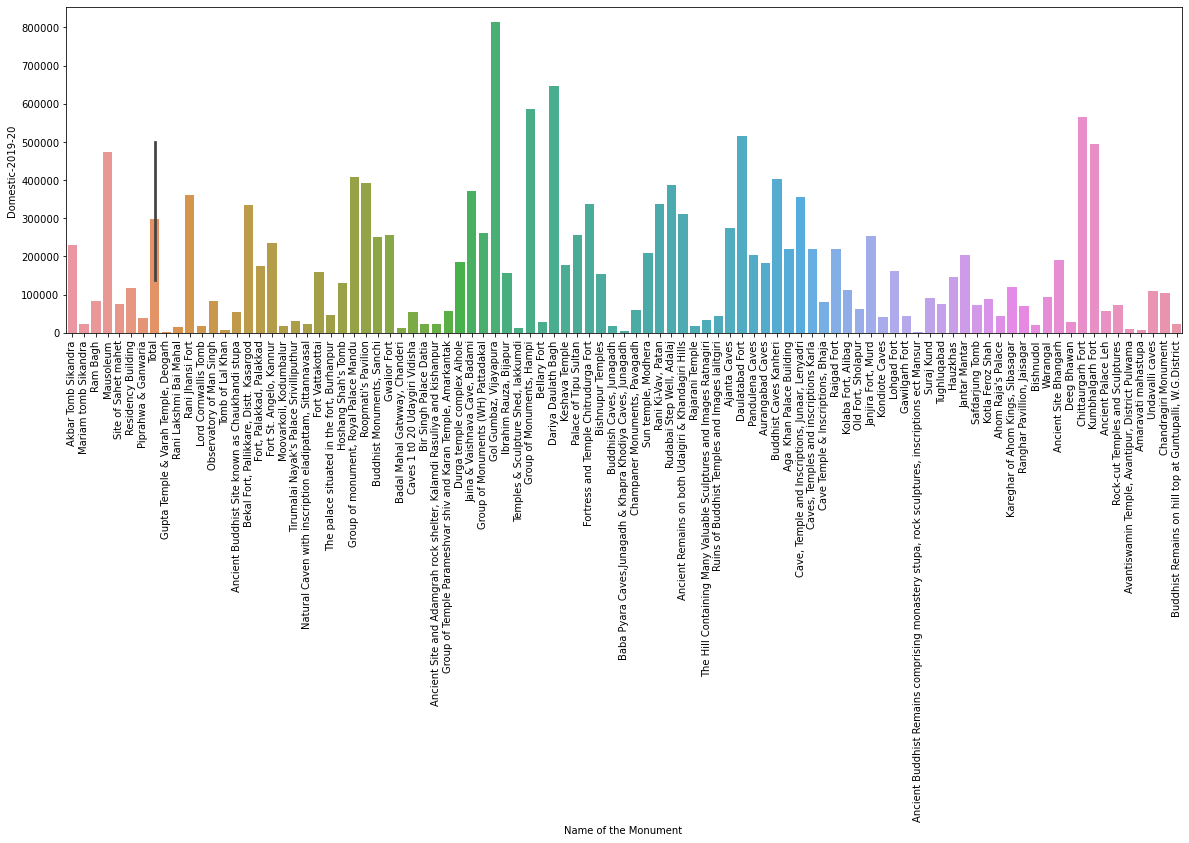

In [20]:
plt.figure(figsize=(20,6))
sns.barplot(x="Name of the Monument ",y='Domestic-2019-20',data=df)
plt.xticks(rotation=90)
plt.show()

## Inferences:
We can see the top tourist visited tourist spot is Gol Gumbaz,vijaypura and shortly visited tourist spot is Gupta temple& varah temple,Deograh  

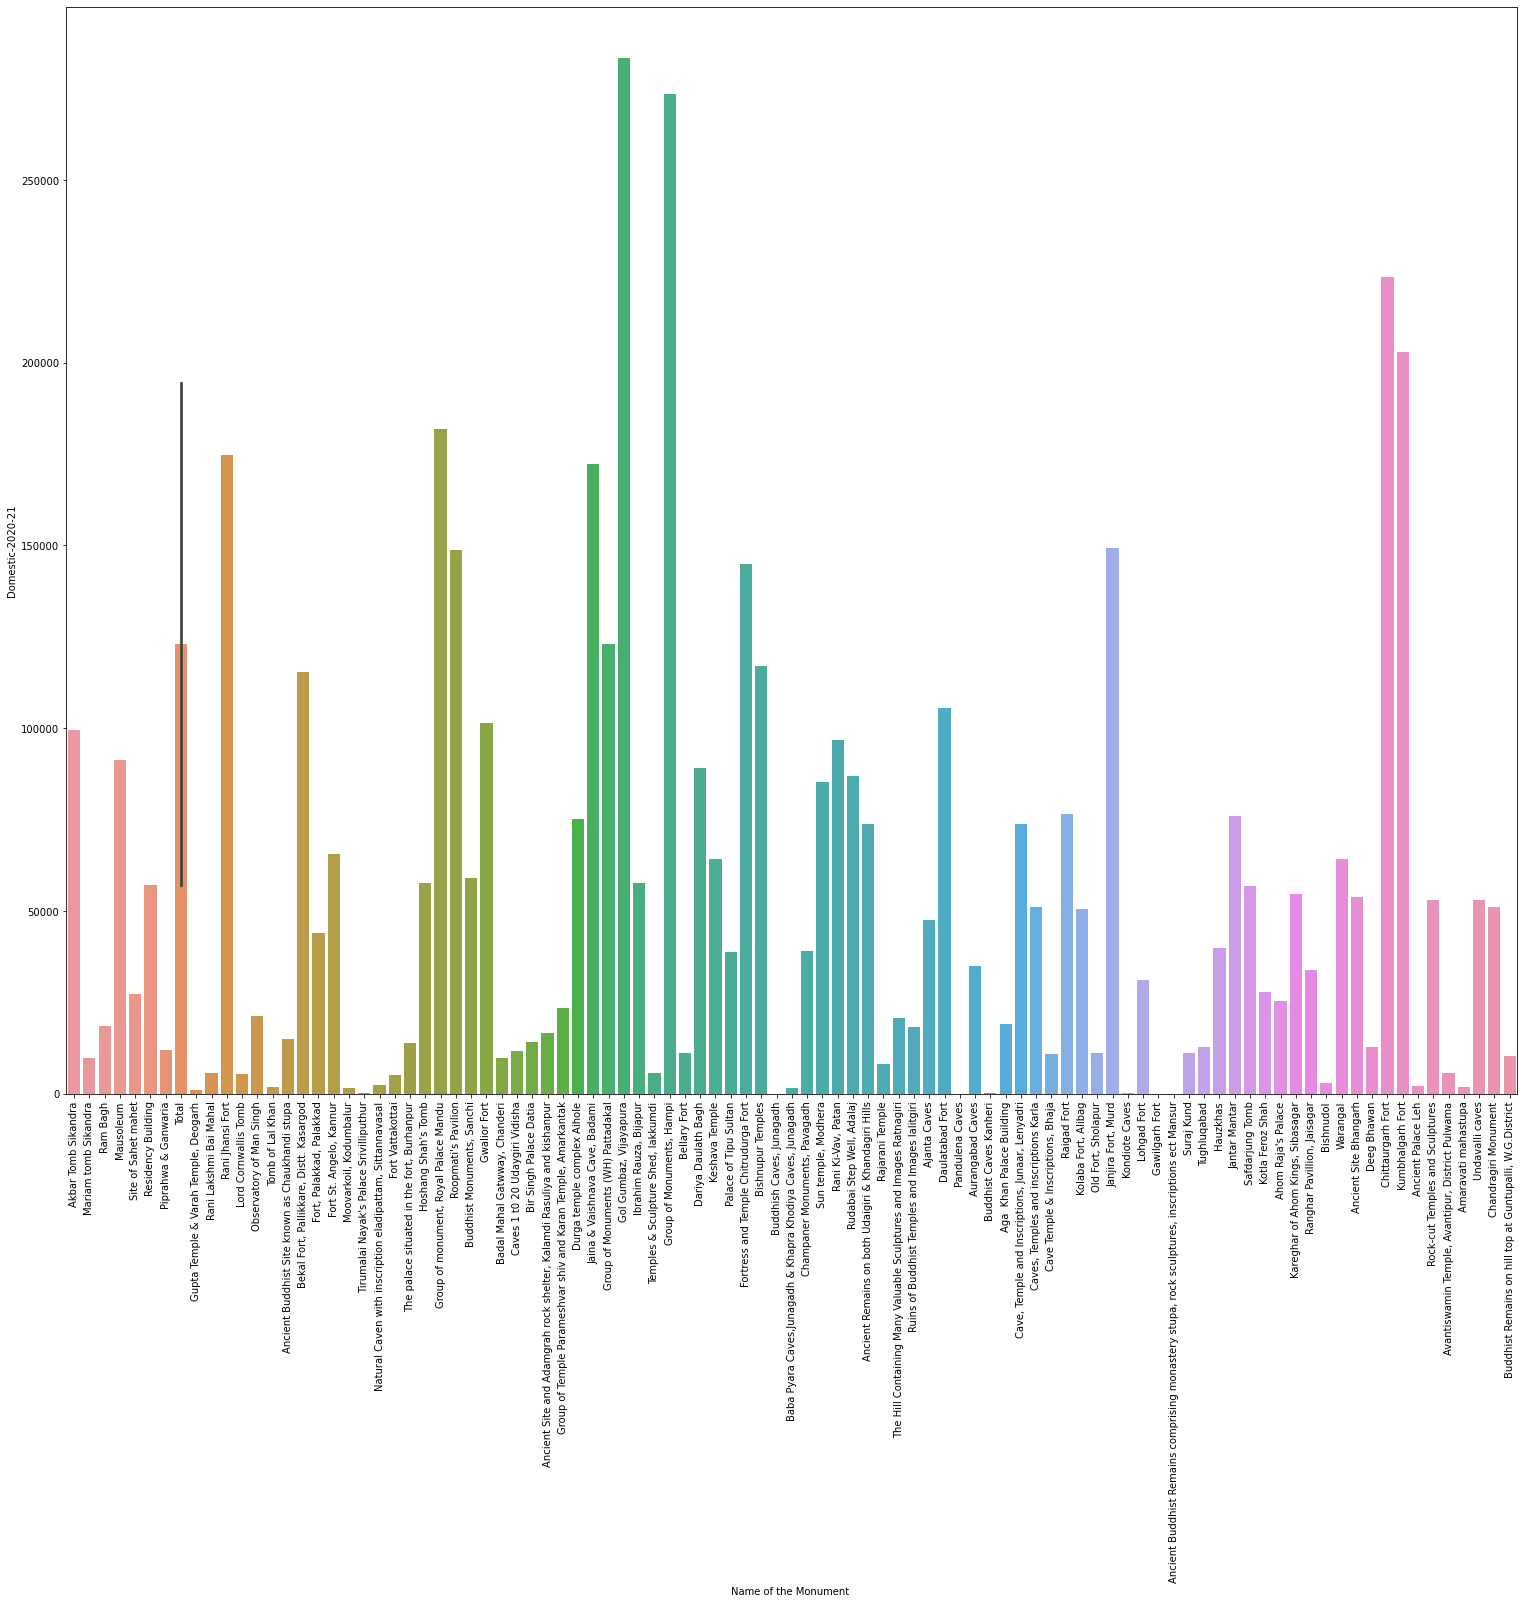

In [21]:
plt.figure(figsize=(26,20))
sns.barplot(x="Name of the Monument ",y='Domestic-2020-21',data=df)
plt.xticks(rotation=90)
plt.show()

In [22]:
total_city_domestic=df.groupby(['Circle'])['Circle','Domestic-2019-20','Domestic-2020-21'].sum()
total_city_domestic.head()

,Domestic-2019-20,Domestic-2020-21
Circle,,
Agra,810300.0,219058.0
Amaravati,243187.0,116120.0
Aurangabad,1174182.0,187993.0
Banglore,1420289.0,336796.0
Bhopal,1575262.0,598021.0


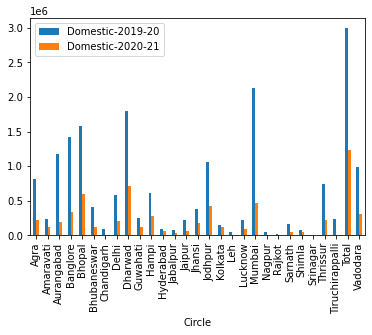

In [23]:
total_city_domestic.plot.bar();

### line plot

<Figure size 1296x1008 with 0 Axes>

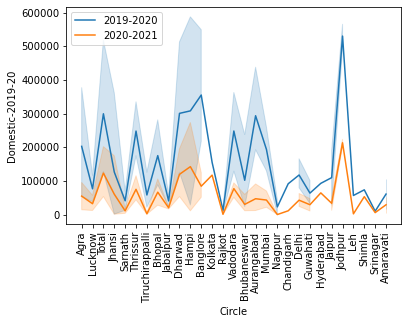

In [24]:
plt.figure(figsize=(18,14))
ax=plt.subplots()
ax=sns.lineplot(x="Circle",y="Domestic-2019-20",data=df,label="2019-2020")
ax1=sns.lineplot(x="Circle",y="Domestic-2020-21",data=df,label="2020-2021")
plt.xticks(rotation=90)
plt.legend();

### pair plot

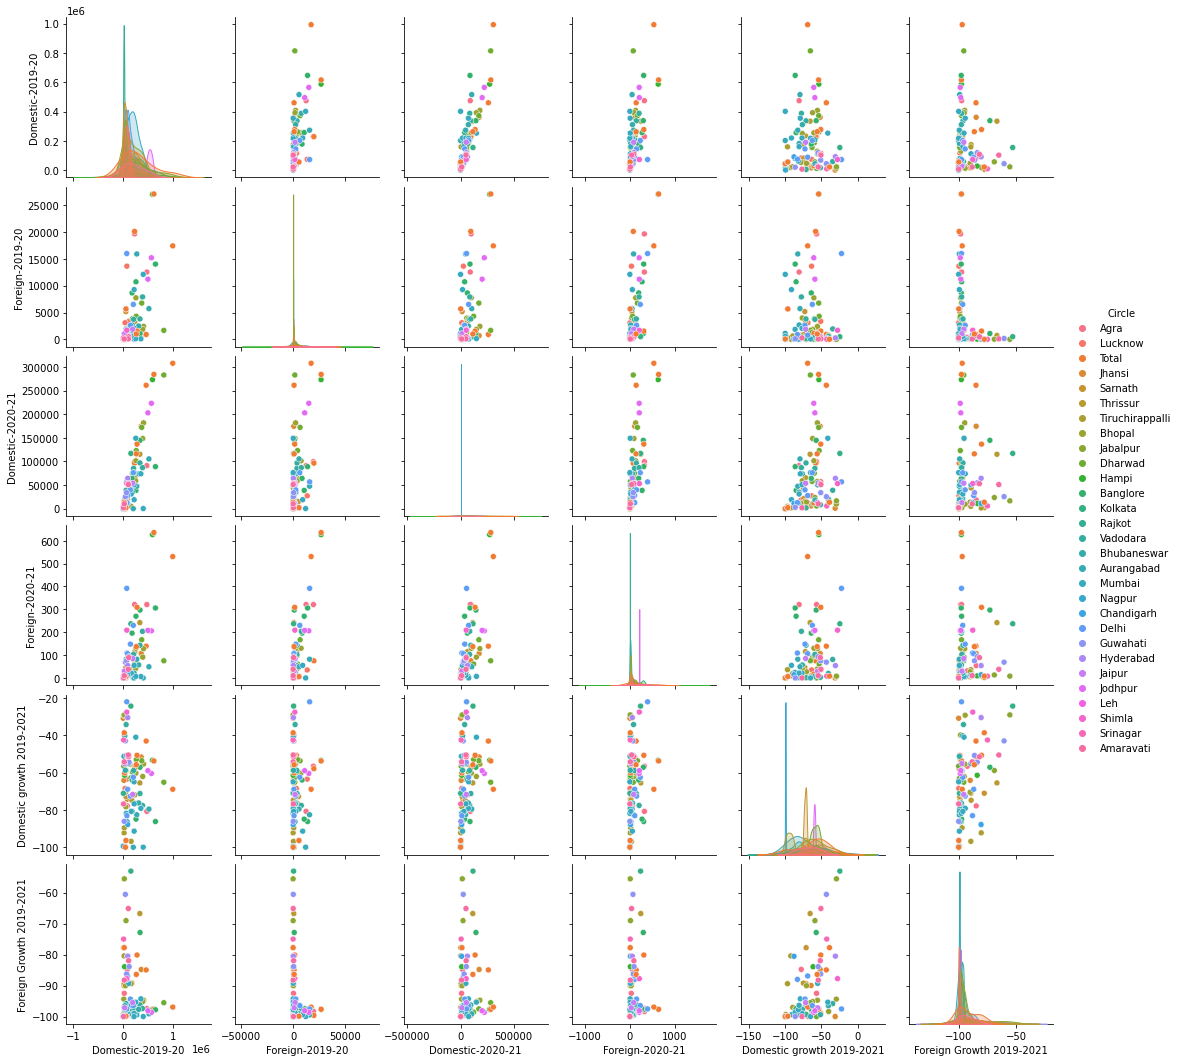

<Figure size 1296x864 with 0 Axes>

In [26]:
sns.pairplot(data=df,hue='Circle')
plt.figure(figsize=(18,12))
plt.show()

#### Perform Label Encoding to convert the categorical variables

In [27]:
le=LabelEncoder()

In [28]:
df['Circle']=le.fit_transform(df['Circle'])

In [29]:
df.columns

Index(['Circle', 'Name of the Monument ', 'Domestic-2019-20',
       'Foreign-2019-20', 'Domestic-2020-21', 'Foreign-2020-21',
       'Domestic growth 2019-2021', 'Foreign Growth 2019-2021'],
      dtype='object')

In [30]:
df['Name of the Monument ']=le.fit_transform(df['Name of the Monument '])

### Check the correlation with the target variable Domestic-2020-21

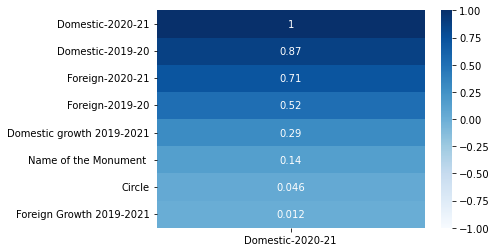

In [31]:
sns.heatmap(df.corr()[["Domestic-2020-21"]].sort_values(by="Domestic-2020-21",
ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues");

In [32]:
x=df[["Domestic-2019-20",'Foreign-2020-21','Foreign-2019-20']].values

In [33]:
y=df[["Domestic-2020-21"]].values

### feature scaling

In [34]:
sl=StandardScaler()

In [35]:
x = sl.fit_transform(x)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

### Model building

In [37]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [38]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  31192.417417257424
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  31087.941909396333
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  85418.78038242512
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  48781.53991831304
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  37009.83513430027
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  38677.64718335612
**********************************************

In [39]:
model=Ridge()

In [40]:
model.fit(x_train,y_train)

Ridge()

In [41]:
y_pred = model.predict(x)

In [42]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

### comparing actual vs predicted 

In [46]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,99509.0,83984.498606
1,9765.0,10417.501931
2,18599.0,32828.722495
3,91185.0,170791.343949
4,27201.0,-2026.909464


### scatter plot

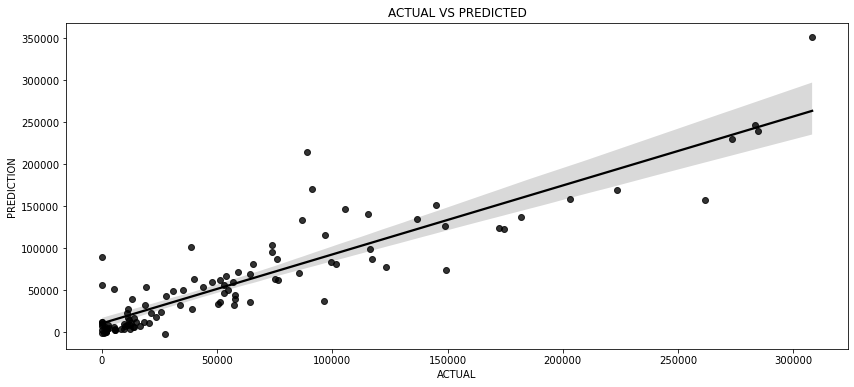

In [44]:
plt.figure(figsize=(14,6))
plt.title('ACTUAL VS PREDICTED')
sns.regplot(data=OUTPUT, x="ACTUAL", y="PREDICTION", color='black');

In [45]:
model.score(x,y)

0.810351937384009